3. Detectar los roles en dicha red utilizando el algoritmo RolX, explicando el resultado obtenido.
   
**[3 puntos]**

In [1]:
import networkx as nx
import pandas as pd

In [2]:
net = pd.read_csv('../data/World.csv')
G = nx.from_pandas_edgelist(net,'Origen','Destino')

In [3]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor
import matplotlib.pyplot as plt

In [4]:
def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)

    available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', 'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00','role_6':'#aa0000' , 'role_7':'#0000aa'}
    
    colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]
    
    pos = nx.spring_layout(G)
    if big:
        plt.figure(figsize=(30,30))
        fontsize = 30
    else:
        plt.figure(figsize=(20,20))
        fontsize = 20

    plt.title(title,fontdict={'fontsize':fontsize})

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=700, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

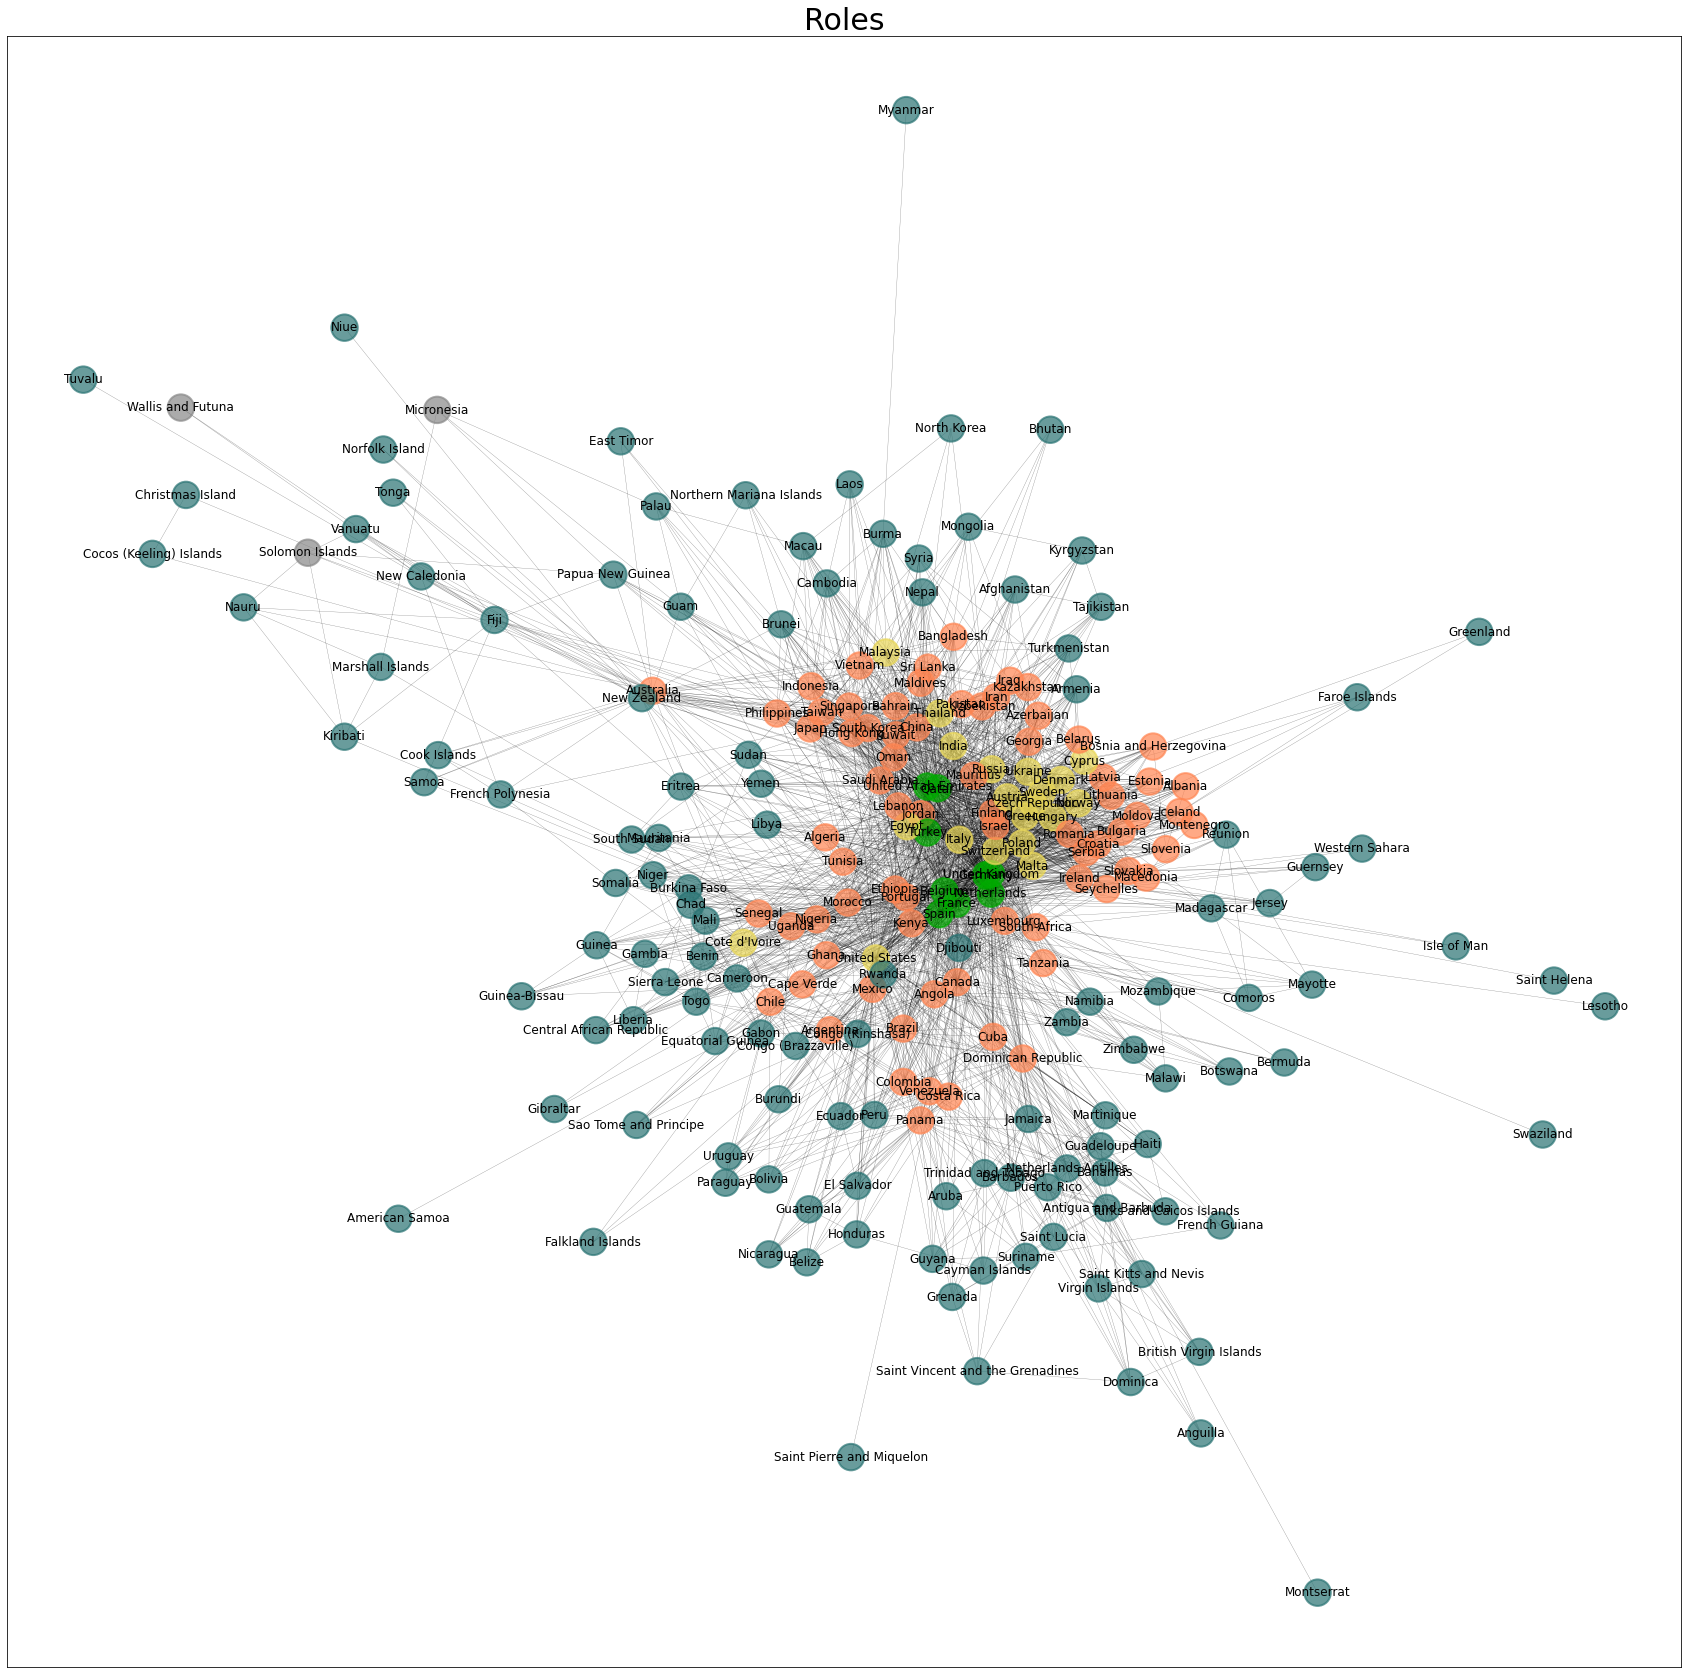

In [5]:
extract_roles_and_plot(G,title='Roles',big=True)

In [6]:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

In [7]:
from collections import defaultdict

In [8]:
roles_dict = defaultdict(list)
for n in node_roles:
    roles_dict[node_roles[n]].append(n)


In [9]:
role_analisys = {
    'role_0': {
        'degree': 0,
        'centrality': 0
    },
    'role_1': {
        'degree': 0,
        'centrality': 0
    },
    'role_2': {
        'degree': 0,
        'centrality': 0
    },
    'role_3': {
        'degree': 0,
        'centrality': 0
    },
    'role_4': {
        'degree': 0,
        'centrality': 0
    }
}

In [10]:
btwn_cent = nx.betweenness_centrality(G)

In [11]:
for n in G.nodes():
    if node_roles[n] == 'role_0':
        role_analisys['role_0']['degree'] += G.degree(n)
        role_analisys['role_0']['centrality'] += btwn_cent[n]
    elif node_roles[n] == 'role_1':
        role_analisys['role_1']['degree'] += G.degree(n)
        role_analisys['role_1']['centrality'] += btwn_cent[n]
    elif node_roles[n] == 'role_2':
        role_analisys['role_2']['degree'] += G.degree(n)
        role_analisys['role_2']['centrality'] += btwn_cent[n]
    elif node_roles[n] == 'role_3':
        role_analisys['role_3']['degree'] += G.degree(n)
        role_analisys['role_3']['centrality'] += btwn_cent[n]
    elif node_roles[n] == 'role_4':
        role_analisys['role_4']['degree'] += G.degree(n)
        role_analisys['role_4']['centrality'] += btwn_cent[n]

role_analisys['role_0']['degree'] = role_analisys['role_0']['degree']/len(roles_dict['role_0'])
role_analisys['role_1']['degree'] = role_analisys['role_1']['degree']/len(roles_dict['role_1'])
role_analisys['role_2']['degree'] = role_analisys['role_2']['degree']/len(roles_dict['role_2'])
role_analisys['role_3']['degree'] = role_analisys['role_3']['degree']/len(roles_dict['role_3'])
role_analisys['role_4']['degree'] = role_analisys['role_4']['degree']/len(roles_dict['role_4'])

role_analisys['role_0']['centrality'] = role_analisys['role_0']['centrality']/len(roles_dict['role_0'])
role_analisys['role_1']['centrality'] = role_analisys['role_1']['centrality']/len(roles_dict['role_1'])
role_analisys['role_2']['centrality'] = role_analisys['role_2']['centrality']/len(roles_dict['role_2'])
role_analisys['role_3']['centrality'] = role_analisys['role_3']['centrality']/len(roles_dict['role_3'])
role_analisys['role_4']['centrality'] = role_analisys['role_4']['centrality']/len(roles_dict['role_4'])

In [12]:
role_analisys

{'role_0': {'degree': 57.25, 'centrality': 0.012975895509131832},
 'role_1': {'degree': 9.524193548387096, 'centrality': 0.0009625121173228564},
 'role_2': {'degree': 33.50684931506849, 'centrality': 0.005884932162109333},
 'role_3': {'degree': 4.0, 'centrality': 9.572187625632562e-05},
 'role_4': {'degree': 102.22222222222223, 'centrality': 0.04992226785242998}}

Roles       | Promedio Grados | Promedio Centralidad | Países
------------|-----------------|---------------------|---------
Amarillo     | 57.25              |0.012975895509131832  | Austria, Cote d'Ivoire, Cyprus, Czech Republic, Denmark, Egypt, Greece, Hungary, India, Italy, Malaysia, Malta, Norway, Poland, Russia, Sweden, Switzerland, Thailand, Ukraine, United States
Azul      | 9.524193548387096  |0.0009625121173228564 | Afghanistan, American Samoa, Anguilla, Antigua and Barbuda, Armenia, Aruba, Bahamas, Barbados, Belize, Benin, Bermuda, Bhutan, Bolivia, Botswana, British Virgin Islands, Brunei, Burkina Faso, Burma, Burundi, Cambodia, Cameroon, Cayman Islands, Central African Republic, Chad, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo (Brazzaville), Congo (Kinshasa), Cook Islands, Djibouti, Dominica, East Timor, Ecuador, El Salvador, Equatorial Guinea, Eritrea, Falkland Islands, Faroe Islands, Fiji, French Guiana, French Polynesia, Gabon, Gambia, Gibraltar, Greenland, Grenada, Guadeloupe, Guam, Guatemala, Guernsey, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Isle of Man, Jamaica, Jersey, Kiribati, Kyrgyzstan, Laos, Lesotho, Liberia, Libya, Macau, Madagascar, Malawi, Mali, Marshall Islands, Martinique, Mauritania, Mayotte, Mongolia, Montserrat, Mozambique, Myanmar, Namibia, Nauru, Nepal, Netherlands Antilles, New Caledonia, New Zealand, Nicaragua, Niger, Niue, Norfolk Island, North Korea, Northern Mariana Islands, Palau, Papua New Guinea, Paraguay, Peru, Puerto Rico, Reunion, Rwanda, Saint Helena, Saint Kitts and Nevis, Saint Lucia, Saint Pierre and Miquelon, Saint Vincent and the Grenadines, Samoa, Sao Tome and Principe, Sierra Leone, Somalia, South Sudan, Sudan, Suriname, Swaziland, Syria, Tajikistan, Togo, Tonga, Trinidad and Tobago, Turkmenistan, Turks and Caicos Islands, Tuvalu, Uruguay, Vanuatu, Virgin Islands, Western Sahara, Yemen, Zambia, Zimbabwe
Naranja      | 33.50684931506849  |0.005884932162109333 | Albania, Algeria, Angola, Argentina, Australia, Azerbaijan, Bahrain, Bangladesh, Belarus, Bosnia and Herzegovina, Brazil, Bulgaria, Canada, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cuba, Dominican Republic, Estonia, Ethiopia, Finland, Georgia, Ghana, Hong Kong, Iceland, Indonesia, Iran, Iraq, Ireland, Israel, Japan, Jordan, Kazakhstan, Kenya, Kuwait, Latvia, Lebanon, Lithuania, Luxembourg, Macedonia, Maldives, Mauritius, Mexico, Moldova, Montenegro, Morocco, Nigeria, Oman, Pakistan, Panama, Philippines, Portugal, Romania, Saudi Arabia, Senegal, Serbia, Seychelles, Singapore, Slovakia, Slovenia, South Africa, South Korea, Sri Lanka, Taiwan, Tanzania, Tunisia, Uganda, Uzbekistan, Venezuela, Vietnam
Gris      | 4.0                |9.572187625632562e-05 | Micronesia, Solomon Islands, Wallis and Futuna
Verde      | 102.22222222222223 |0.04992226785242998 | Belgium, France, Germany, Netherlands, Qatar, Spain, Turkey, United Arab Emirates, United Kingdom


Viendo estos resultados, claramente se nota que el role esta muy ligado a el grado y la centralidad del nodo, con lo cual se podría decir que los nodos azules y grises probablemente representen nodos perfericos, en los cuales haya que hacer varias combinaciones de vuelos para llegar a ellos. Los naranjas representan nodos un poco más accesibles, pero no tan importantes dentro de la red, y por ultimo los amarillos y verdes representen nodos con muchas aristas de los cuales se necesten muy pocas combinaciones para llegar a ellos.